In [0]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 1024*3
hidden_size = 500
num_classes = 10
num_epochs = 100
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.CIFAR10(root='../../data',        
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

100%|█████████▉| 169779200/170498071 [00:10<00:00, 15296317.52it/s]

In [0]:
import torch
import torch.nn as nn
from torchsummary import summary

class CIFAR10(nn.Module):
    def __init__(self):
        super(CIFAR10, self).__init__()
        self.pad1 = nn.ZeroPad2d((2, 2, 2, 2))
        
        self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(7, 7), stride=(1, 1), bias=False), 
        nn.BatchNorm2d(num_features=32),
        nn.MaxPool2d(kernel_size=(2,2)),
        nn.ReLU()
        )
    
        self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(5, 5), stride=(1, 1), bias=False), 
        nn.BatchNorm2d(num_features=64),
        nn.ReLU()
        )
        
        self.layer3 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), stride=(1, 1), bias=False), 
        nn.BatchNorm2d(num_features=128),
        nn.MaxPool2d(kernel_size=(2, 2)),
        nn.ReLU()
        )

        self.layer4 = nn.Sequential(
        nn.Conv2d(in_channels=128, out_channels=200, kernel_size=(3, 3), stride=(1, 1), bias=False), 
        nn.BatchNorm2d(num_features=200),
        nn.ReLU()
        )

        self.fc1 = nn.Sequential(
        nn.Linear(in_features=800, out_features=512),
        nn.ReLU()
        )

        self.dropout1 = nn.Dropout(p=0.2)
        
        self.fc2 = nn.Sequential(
        nn.Linear(in_features=512, out_features=10),
        nn.Softmax()
        )
        
    def forward(self, x):
        x = self.pad1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        x = self.dropout1(x)
        out = self.fc2(x)
        
        return out
      
my_model = CIFAR10().to(device)
summary(my_model, input_size=(3, 32, 32))  

170500096it [00:29, 15296317.52it/s]                               

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1            [-1, 3, 36, 36]               0
            Conv2d-2           [-1, 32, 30, 30]           4,704
       BatchNorm2d-3           [-1, 32, 30, 30]              64
         MaxPool2d-4           [-1, 32, 15, 15]               0
              ReLU-5           [-1, 32, 15, 15]               0
            Conv2d-6           [-1, 64, 11, 11]          51,200
       BatchNorm2d-7           [-1, 64, 11, 11]             128
              ReLU-8           [-1, 64, 11, 11]               0
            Conv2d-9            [-1, 128, 9, 9]          73,728
      BatchNorm2d-10            [-1, 128, 9, 9]             256
        MaxPool2d-11            [-1, 128, 4, 4]               0
             ReLU-12            [-1, 128, 4, 4]               0
           Conv2d-13            [-1, 200, 2, 2]         230,400
      BatchNorm2d-14            [-1, 20

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [0]:
my_model = CIFAR10().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_model.parameters(), lr=0.01) 
print("Learning rate: ", learning_rate)

Learning rate:  0.001


In [0]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images_np = np.asarray(images)
        images = images.reshape(-1, 3, 32, 32).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = my_model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch [1/100], Step [100/500], Loss: 2.1310
Epoch [1/100], Step [200/500], Loss: 2.2213
Epoch [1/100], Step [300/500], Loss: 2.1724
Epoch [1/100], Step [400/500], Loss: 2.1313
Epoch [1/100], Step [500/500], Loss: 2.2270
Epoch [2/100], Step [100/500], Loss: 2.2110
Epoch [2/100], Step [200/500], Loss: 2.0950
Epoch [2/100], Step [300/500], Loss: 2.1802
Epoch [2/100], Step [400/500], Loss: 2.2682
Epoch [2/100], Step [500/500], Loss: 2.2088
Epoch [3/100], Step [100/500], Loss: 2.1941
Epoch [3/100], Step [200/500], Loss: 2.2702
Epoch [3/100], Step [300/500], Loss: 2.2306
Epoch [3/100], Step [400/500], Loss: 2.2409
Epoch [3/100], Step [500/500], Loss: 2.1511
Epoch [4/100], Step [100/500], Loss: 2.1820
Epoch [4/100], Step [200/500], Loss: 2.1435
Epoch [4/100], Step [300/500], Loss: 2.1804
Epoch [4/100], Step [400/500], Loss: 2.1512
Epoch [4/100], Step [500/500], Loss: 2.2217
Epoch [5/100], Step [100/500], Loss: 2.1396
Epoch [5/100], Step [200/500], Loss: 2.1739
Epoch [5/100], Step [300/500], L

In [0]:
# Test the model before performing adverserial attacks
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 3, 32, 32).to(device)
        labels = labels.to(device)
        outputs = my_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the 10000 test images: 26.41 %


In [0]:
for param in my_model.parameters():
    param.requires_grad= False

In [0]:
import numpy as np

# Targeted FGSM attack
epsilon=[0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3]
average_accuracies = []
save_images = []

for value in epsilon:
    accuracy = []
    for k in range(1, 10):
        l=[]
        sign=[]
        flag = 1
        for i,(images,labels) in enumerate(test_loader):
            copyOf_images=images.clone().detach()
            copyOf_images=copyOf_images.reshape(-1,3,32,32).clone().to(device)
            copyOf_images.requires_grad=True
            target_class=(labels+k)%10  #missing classifying it with 10 classes though it has to be correct at least once
            target_class=target_class.to(device)

            #forward pass
            outputs=my_model(copyOf_images)
            loss=criterion(outputs,target_class)

            #backward and optimize
            optimizer.zero_grad()
            loss.backward()
            c=copyOf_images.grad.sign()
            #actual.append((images,labels))
            copyOf_images=copyOf_images-(value*c) 
            copyOf_images=torch.clamp(copyOf_images,0,1)
            sign.append(c)
            l.append((copyOf_images,labels))
            if(k == 2 and flag == 1):
              save_images.append(copyOf_images[0].cpu().detach().permute(1, 2, 0))
              flag = 0
            
        with torch.no_grad():
            correct=0
            total=0
            for images,labels in l:
                images=images.reshape(-1,3,32,32).to(device)
                labels=labels.to(device)
                outputs=my_model(images)
                _,predicted=torch.max(outputs.data,1)
                total+=labels.size(0)
                correct+=(predicted==labels).sum().item()
                accuracy.append(100*correct/total)
            print("accuracy of the network on the 10000 test images for epsilon value {}:{} %".format(value,100*correct/total)) 
    accuracy = np.asarray(accuracy)
    average_accuracies.append(np.mean(accuracy))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


accuracy of the network on the 10000 test images for epsilon value 0.0001:69.54 %
accuracy of the network on the 10000 test images for epsilon value 0.0001:69.93 %
accuracy of the network on the 10000 test images for epsilon value 0.0001:69.83 %
accuracy of the network on the 10000 test images for epsilon value 0.0001:69.82 %
accuracy of the network on the 10000 test images for epsilon value 0.0001:70.16 %
accuracy of the network on the 10000 test images for epsilon value 0.0001:69.76 %
accuracy of the network on the 10000 test images for epsilon value 0.0001:69.66 %
accuracy of the network on the 10000 test images for epsilon value 0.0001:69.51 %
accuracy of the network on the 10000 test images for epsilon value 0.0001:69.82 %
accuracy of the network on the 10000 test images for epsilon value 0.0003:69.2 %
accuracy of the network on the 10000 test images for epsilon value 0.0003:68.82 %
accuracy of the network on the 10000 test images for epsilon value 0.0003:69.17 %
accuracy of the n

[69.9217480208212, 69.27044238765257, 67.26257596691657, 65.60755103637499, 63.32840495638567, 59.063238195821405, 47.574498151106354, 29.550498492383994]


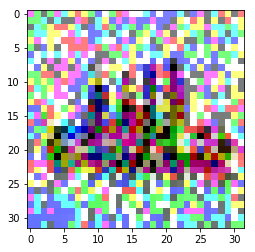

In [0]:
import matplotlib.pyplot as plt
plt.imshow(copyOf_images[0].cpu().detach().permute(1, 2, 0))

In [0]:
l = []
sign = []
for epoch in range(1):
    for i, (images, labels) in enumerate(test_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 3, 32, 32).to(device)
        images.requires_grad=True
        labels = labels.to(device)
        
        # Forward pass
        outputs = my_model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize

        loss.backward()
        c =images.grad.sign()
        images = images+ 0.01* c
        sign.append(c)
        l.append((images,labels))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [0]:
im, _ = l[0]
im = im.data.cpu().numpy()

In [0]:
im = im.reshape(100, 3, 32, 32)

In [0]:
import matplotlib.pyplot as plt


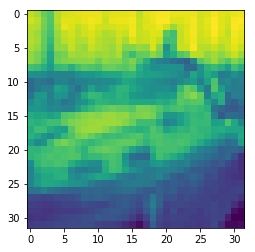

In [0]:
plt.imshow(im[2, 0, :, :])

In [0]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in l:
        images = images.reshape(-1, 3, 32, 32).to(device)
        labels = labels.to(device)
        outputs = my_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the 10000 test images: 48.88 %


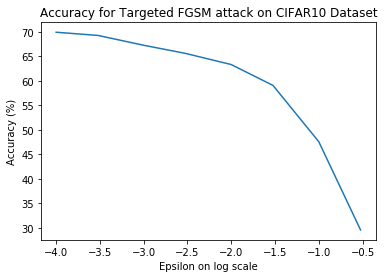

In [0]:
from matplotlib import pyplot as plt

epsilon=[0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3]
epsilon = np.asarray(epsilon)
epsilon = np.log10(epsilon)
accuracy = [69.92, 69.27, 67.26, 65.60, 63.32, 59.06, 47.57, 29.55]

plt.plot(epsilon, accuracy)
plt.xlabel("Epsilon on log scale")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy for Targeted FGSM attack on CIFAR10 Dataset")
plt.show()